<a href="https://colab.research.google.com/github/veenakenche/ML/blob/main/1BM23CS135_K_VEENA_lab_3_pyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


url = "https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv"
housing = pd.read_csv(url)


print(housing.info())
print(housing.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

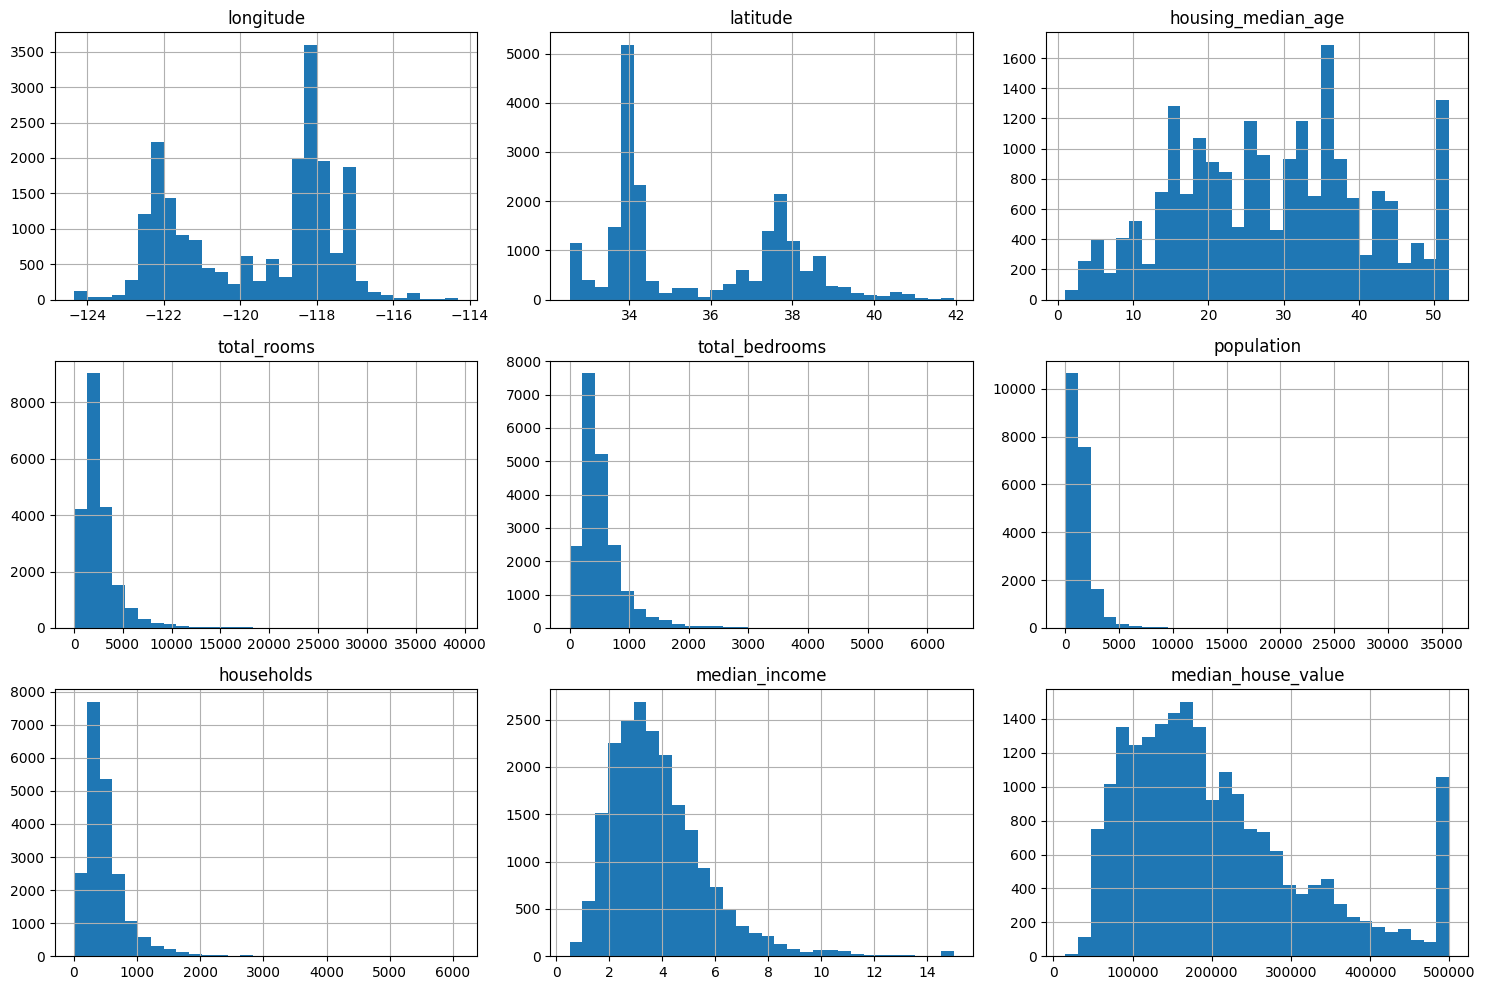

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., 100],
    labels=[1, 2, 3, 4, 5]
)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]


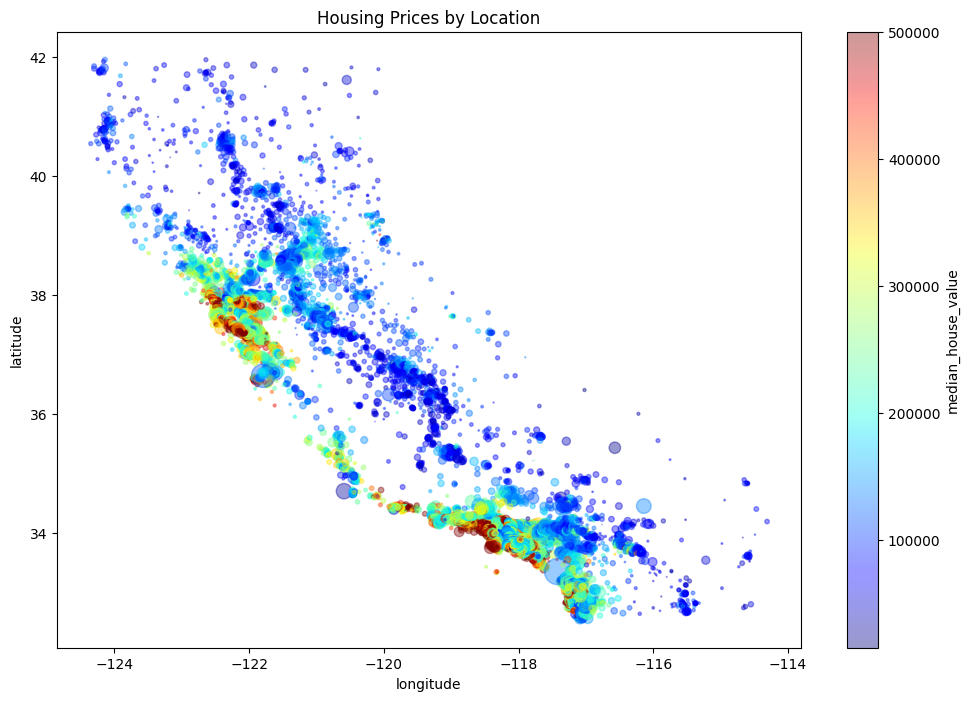

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.4, s=housing["population"] / 100,
             c="median_house_value", cmap="jet", colorbar=True,
             figsize=(12,8))
plt.title("Housing Prices by Location")
plt.show()


In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


Max Correlated Feature: median_income


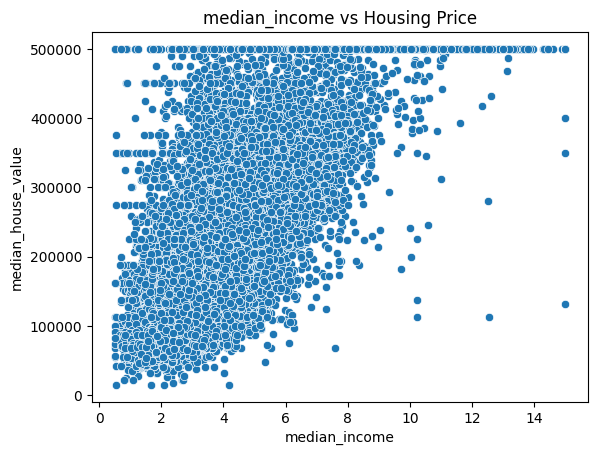

In [ ]:
import seaborn as sns

max_corr = corr_matrix["median_house_value"].drop("median_house_value").idxmax()
print("Max Correlated Feature:", max_corr)

sns.scatterplot(data=housing, x=max_corr, y="median_house_value")
plt.title(f"{max_corr} vs Housing Price")
plt.show()


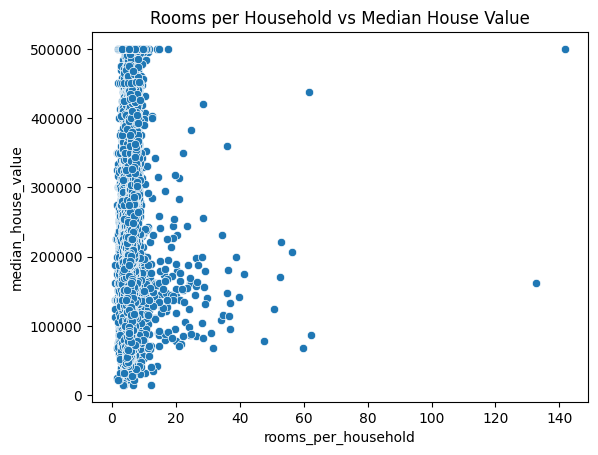

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=housing, x="rooms_per_household", y="median_house_value")
plt.title("Rooms per Household vs Median House Value")
plt.show()


In [ ]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
corr_matrix = housing_num.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [ ]:
housing.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=['number'])   # select only numeric columns

housing_num_imputed = pd.DataFrame(
    imputer.fit_transform(housing_num),
    columns=housing_num.columns
)


In [ ]:
housing_clean.dtypes
housing_final = pd.get_dummies(housing_clean, columns=["ocean_proximity"])
housing_final.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,False,False,False,True,False


In [ ]:
9) Importance of Feature Scaling

 Machine learning algorithms like KNN, SVM, Linear Regression assume features on similar scale.

Scaling:

Prevents dominance of features with large ranges.

Improves convergence in gradient descent.

Makes distance-based metrics meaningful.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
("cat", OneHotEncoder(), cat_attribs)



('cat', OneHotEncoder(), ['ocean_proximity'])